In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.express as px
df=pd.read_csv(r'C:\Users\acer\Desktop\sample_datasets\vgsales.csv')
df.head()


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [2]:
df.shape

(16598, 11)

In [3]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [4]:
#dropping rows with nan/null value
df=df.dropna(subset=['Year','Publisher'],axis=0)
df=df.reset_index(drop=True)
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16291 entries, 0 to 16290
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  float64
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [6]:
#converting float year into int
df['Year']=df['Year'].astype(int)
df['Year'].dtype

dtype('int32')

Text(0, 0.5, 'No. of Games Sold')

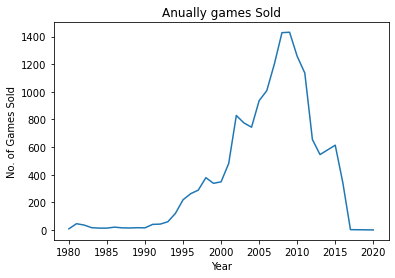

In [7]:
yearly_sold=dict(df['Name'].groupby(df['Year']).count())
sns.lineplot(x=yearly_sold.keys(),y=yearly_sold.values(),data=df).set_title('Anually games Sold')
plt.xlabel('Year')
plt.ylabel('No. of Games Sold')


you can see that there is a spike after 2000's in the year btw 2008-2009

Text(0, 0.5, 'Global Sales')

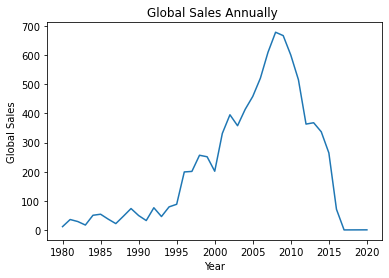

In [8]:
global_sales=dict(df['Global_Sales'].groupby(df['Year']).sum())
sns.lineplot(x=global_sales.keys(),y=global_sales.values(),data=df).set_title('Global Sales Annually ')
plt.xlabel('Year')
plt.ylabel('Global Sales')

In [9]:
df1=df[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].groupby(df['Year']).sum()
df1.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Year,,,,
1980,10.59,0.67,0.00,0.12
1981,33.40,1.96,0.00,0.32
1982,26.92,1.65,0.00,0.31
1983,7.76,0.80,8.10,0.14
1984,33.28,2.10,14.27,0.70


In [10]:
#df.pivot_table(index="Year",columns=['NA_Sales','EU_Sales','JP_Sales','Other_Sales'],aggfunc="count")
df1=df1.reset_index()
df1.head()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1980,10.59,0.67,0.00,0.12
1,1981,33.40,1.96,0.00,0.32
2,1982,26.92,1.65,0.00,0.31
3,1983,7.76,0.80,8.10,0.14
4,1984,33.28,2.10,14.27,0.70


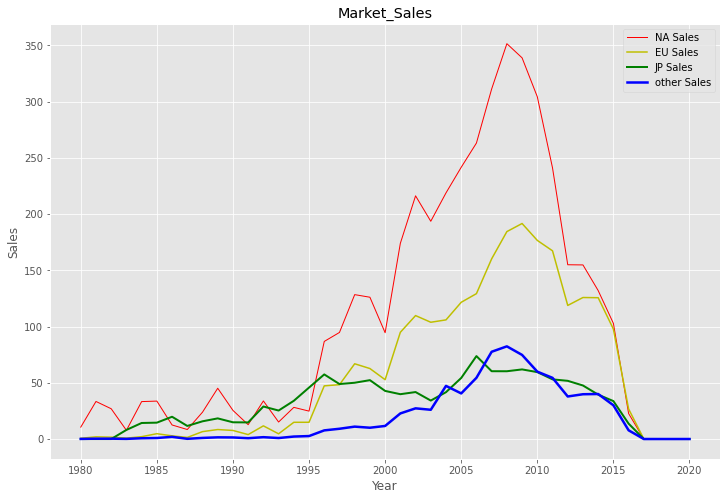

In [11]:
from matplotlib import style
style.use('ggplot')
plt.figure(figsize=(12,8))
plt.plot(df1['Year'],df1['NA_Sales'],'r',label='NA Sales',linewidth=1)
plt.plot(df1['Year'],df1['EU_Sales'],'y',label='EU Sales',linewidth=1.5)
plt.plot(df1['Year'],df1['JP_Sales'],'g',label='JP Sales',linewidth=2)
plt.plot(df1['Year'],df1['Other_Sales'],'b',label='other Sales',linewidth=2.5)
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Market_Sales')
plt.legend()
plt.show()


In [12]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [13]:
publishers=df['Global_Sales'].groupby(df['Publisher']).sum().sort_values(ascending=False).to_frame()
#publishers=top15_publisher.reset_index()
publishers=publishers.reset_index()
publishers.head()

,Publisher,Global_Sales
0,Nintendo,1784.43
1,Electronic Arts,1093.39
2,Activision,721.41
3,Sony Computer Entertainment,607.28
4,Ubisoft,473.54


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Nintendo'),
  Text(1, 0, 'Electronic Arts'),
  Text(2, 0, 'Activision'),
  Text(3, 0, 'Sony Computer Entertainment'),
  Text(4, 0, 'Ubisoft'),
  Text(5, 0, 'Take-Two Interactive'),
  Text(6, 0, 'THQ'),
  Text(7, 0, 'Konami Digital Entertainment'),
  Text(8, 0, 'Sega'),
  Text(9, 0, 'Namco Bandai Games'),
  Text(10, 0, 'Microsoft Game Studios'),
  Text(11, 0, 'Capcom'),
  Text(12, 0, 'Atari'),
  Text(13, 0, 'Square Enix'),
  Text(14, 0, 'Warner Bros. Interactive Entertainment')])

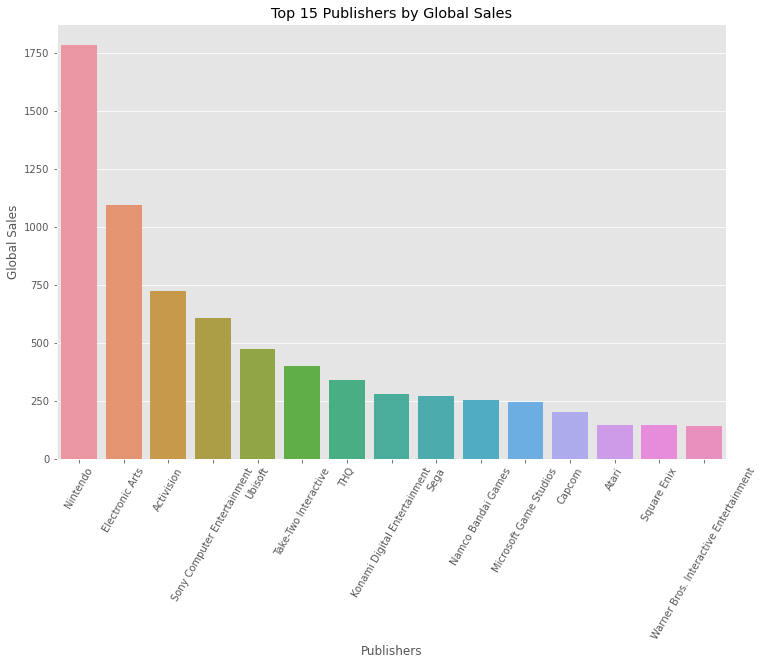

In [14]:
topPublisher=publishers.nlargest(15,'Global_Sales')
plt.figure(figsize=(12,8))
sns.barplot(x=topPublisher.Publisher,y="Global_Sales",data=publishers).set_title('Top 15 Publishers by Global Sales')
plt.xlabel('Publishers')
plt.ylabel('Global Sales')
plt.xticks(rotation=60)



Nintendo has the highest global sales followed by electronic arts & activision

In [15]:
topgames=df['Global_Sales'].groupby(df['Name']).sum().sort_values(ascending=False).to_frame()
topgames=topgames.reset_index()
topgames.head()

,Name,Global_Sales
0,Wii Sports,82.74
1,Grand Theft Auto V,55.92
2,Super Mario Bros.,45.31
3,Tetris,35.84
4,Mario Kart Wii,35.82


In [16]:
top15games=topgames.nlargest(15,'Global_Sales')
top15games.head()

,Name,Global_Sales
0,Wii Sports,82.74
1,Grand Theft Auto V,55.92
2,Super Mario Bros.,45.31
3,Tetris,35.84
4,Mario Kart Wii,35.82


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Wii Sports'),
  Text(1, 0, 'Grand Theft Auto V'),
  Text(2, 0, 'Super Mario Bros.'),
  Text(3, 0, 'Tetris'),
  Text(4, 0, 'Mario Kart Wii'),
  Text(5, 0, 'Wii Sports Resort'),
  Text(6, 0, 'Pokemon Red/Pokemon Blue'),
  Text(7, 0, 'Call of Duty: Modern Warfare 3'),
  Text(8, 0, 'New Super Mario Bros.'),
  Text(9, 0, 'Call of Duty: Black Ops II'),
  Text(10, 0, 'Call of Duty: Black Ops'),
  Text(11, 0, 'Wii Play'),
  Text(12, 0, 'New Super Mario Bros. Wii'),
  Text(13, 0, 'Duck Hunt'),
  Text(14, 0, 'Call of Duty: Ghosts')])

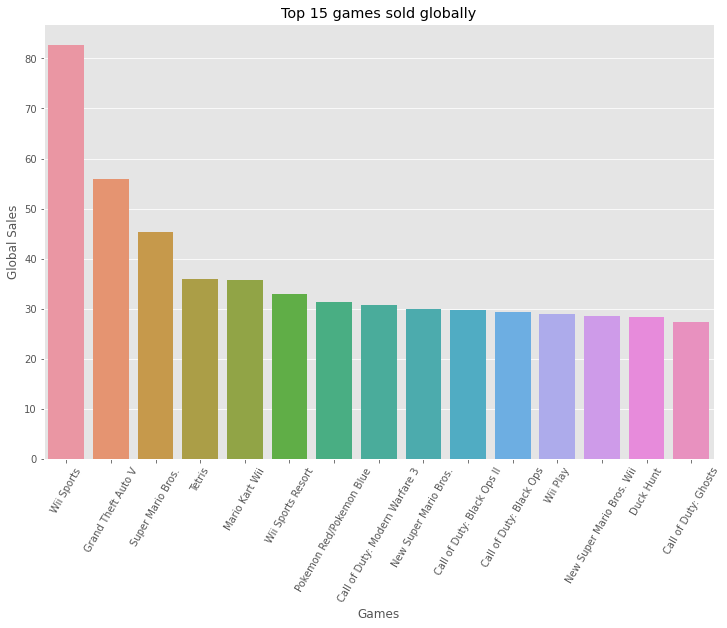

In [17]:
plt.figure(figsize=(12,8))
sns.barplot(x="Name",y="Global_Sales",data=top15games).set_title('Top 15 games sold globally')
plt.xlabel('Games')
plt.ylabel('Global Sales')
plt.xticks(rotation=60)

clearly Wii sports has the highest global sales ,GTA 5 and Super Mario leading after it

In [18]:
topplat=df['Global_Sales'].groupby(df['Platform']).sum().sort_values(ascending=False).to_frame()
topplat=topplat.reset_index()
topplat.head()

,Platform,Global_Sales
0,PS2,1233.46
1,X360,969.60
2,PS3,949.35
3,Wii,909.81
4,DS,818.91


In [19]:
top15platform=topplat.nlargest(15,'Global_Sales')
top15platform.head(15)

,Platform,Global_Sales
0,PS2,1233.46
1,X360,969.60
2,PS3,949.35
3,Wii,909.81
4,DS,818.91
5,PS,727.39
6,GBA,305.62
7,PSP,291.71
8,PS4,278.10
9,PC,254.70


Text(0, 0.5, 'Global Sales')

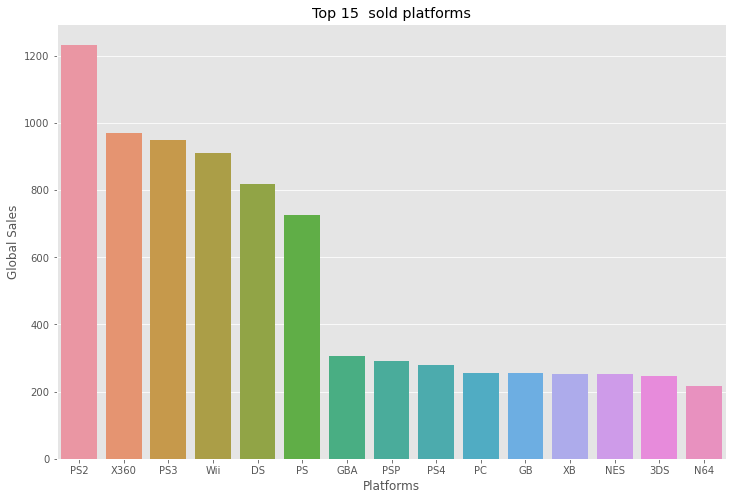

In [20]:
plt.figure(figsize=(12,8))
sns.barplot(x="Platform",y="Global_Sales",data=top15platform).set_title('Top 15  sold platforms')
plt.xlabel('Platforms')
plt.ylabel('Global Sales')


PS2 leading the chart, that's cool 

In [21]:
genre_games =df['Global_Sales'].groupby(df['Genre']).sum().sort_values(ascending=False).to_frame()
genre_games=genre_games.reset_index()

genre_games

,Genre,Global_Sales
0,Action,1722.84
1,Sports,1309.24
2,Shooter,1026.20
3,Role-Playing,923.83
4,Platform,829.13
5,Misc,789.87
6,Racing,726.76
7,Fighting,444.05
8,Simulation,389.98
9,Puzzle,242.21


Text(0.5, 1.0, 'distribution of video games sales by genre')

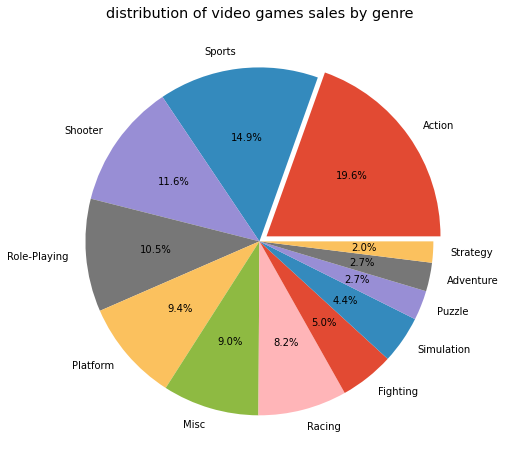

In [22]:

    
explode=(0.05,0,0,0,0,0,0,0,0,0,0,0)  
plt.figure(figsize=(12,8))
plt.pie(genre_games.Global_Sales,labels=genre_games.Genre,explode=explode,autopct='%.1f%%')
plt.title('distribution of video games sales by genre')


Action Games are the most sold games in Genre globally.

In [23]:
df3=df.copy()
df3

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16286,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16287,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16288,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16289,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [24]:
df4=df3.nlargest(50,'Global_Sales')[['Publisher','Name','Global_Sales']]
df4=df4.groupby(pd.Grouper(key='Publisher')).size().reset_index(name='Number of Games')
df4

,Publisher,Number of Games
0,Nintendo,32
1,Microsoft Game Studios,2
2,Take-Two Interactive,6
3,Sony Computer Entertainment,2
4,Activision,8


In [25]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [26]:
ps_df2=df.copy()
ps_df2

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16286,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16287,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16288,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16289,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [27]:
ps_df2=ps_df2['Year'].sort_values().reset_index()
ps_df2

,index,Year
0,257,1980
1,6211,1980
2,1948,1980
3,5282,1980
4,1746,1980
...,...,...
16286,5205,2016
16287,14136,2017
16288,16135,2017
16289,15944,2017


In [28]:
ps_df2=ps_df2.drop('index',axis=1)
ps_df2.head()

,Year
0,1980
1,1980
2,1980
3,1980
4,1980


In [29]:
yr_all=list(ps_df2['Year'].unique())
yr_all        


[1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2020]

In [30]:
yr_dfa=pd.DataFrame({'Year':yr_all})
yr_dfa



,Year
0,1980
1,1981
2,1982
3,1983
4,1984
5,1985
6,1986
7,1987
8,1988
9,1989


In [31]:
ps=df[df['Platform']=='PS'].groupby('Year')['Global_Sales'].sum().reset_index()
ps2=df[df['Platform']=='PS2'].groupby('Year')['Global_Sales'].sum().reset_index()
ps3=df[df['Platform']=='PS3'].groupby('Year')['Global_Sales'].sum().reset_index()
ps4=df[df['Platform']=='PS4'].groupby('Year')['Global_Sales'].sum().reset_index()
psp=df[df['Platform']=='PSP'].groupby('Year')['Global_Sales'].sum().reset_index()
psv=df[df['Platform']=='PSV'].groupby('Year')['Global_Sales'].sum().reset_index()


In [32]:
psm1=pd.merge(yr_dfa,ps,on="Year",how="left")
psm1

,Year,Global_Sales
0,1980,NaN
1,1981,NaN
2,1982,NaN
3,1983,NaN
4,1984,NaN
5,1985,NaN
6,1986,NaN
7,1987,NaN
8,1988,NaN
9,1989,NaN


In [33]:
psm1=psm1.rename(columns={'Global_Sales':'ps_Sales'})
psm1

,Year,ps_Sales
0,1980,NaN
1,1981,NaN
2,1982,NaN
3,1983,NaN
4,1984,NaN
5,1985,NaN
6,1986,NaN
7,1987,NaN
8,1988,NaN
9,1989,NaN


In [34]:
psm2=pd.merge(psm1,ps2,on="Year",how="left")
psm2

,Year,ps_Sales,Global_Sales
0,1980,NaN,NaN
1,1981,NaN,NaN
2,1982,NaN,NaN
3,1983,NaN,NaN
4,1984,NaN,NaN
5,1985,NaN,NaN
6,1986,NaN,NaN
7,1987,NaN,NaN
8,1988,NaN,NaN
9,1989,NaN,NaN


In [35]:
psm2=psm2.rename(columns={'Global_Sales':'ps2_Sales'})
psm2

,Year,ps_Sales,ps2_Sales
0,1980,NaN,NaN
1,1981,NaN,NaN
2,1982,NaN,NaN
3,1983,NaN,NaN
4,1984,NaN,NaN
5,1985,NaN,NaN
6,1986,NaN,NaN
7,1987,NaN,NaN
8,1988,NaN,NaN
9,1989,NaN,NaN


In [36]:
psm3=pd.merge(psm2,ps3,on="Year",how="left")
psm3

,Year,ps_Sales,ps2_Sales,Global_Sales
0,1980,NaN,NaN,NaN
1,1981,NaN,NaN,NaN
2,1982,NaN,NaN,NaN
3,1983,NaN,NaN,NaN
4,1984,NaN,NaN,NaN
5,1985,NaN,NaN,NaN
6,1986,NaN,NaN,NaN
7,1987,NaN,NaN,NaN
8,1988,NaN,NaN,NaN
9,1989,NaN,NaN,NaN


In [37]:
psm3=psm3.rename(columns={'Global_Sales':'ps3_Sales'})
psm3

,Year,ps_Sales,ps2_Sales,ps3_Sales
0,1980,NaN,NaN,NaN
1,1981,NaN,NaN,NaN
2,1982,NaN,NaN,NaN
3,1983,NaN,NaN,NaN
4,1984,NaN,NaN,NaN
5,1985,NaN,NaN,NaN
6,1986,NaN,NaN,NaN
7,1987,NaN,NaN,NaN
8,1988,NaN,NaN,NaN
9,1989,NaN,NaN,NaN


In [38]:
psm4=pd.merge(psm3,ps4,on="Year",how="left")
psm4

,Year,ps_Sales,ps2_Sales,ps3_Sales,Global_Sales
0,1980,NaN,NaN,NaN,NaN
1,1981,NaN,NaN,NaN,NaN
2,1982,NaN,NaN,NaN,NaN
3,1983,NaN,NaN,NaN,NaN
4,1984,NaN,NaN,NaN,NaN
5,1985,NaN,NaN,NaN,NaN
6,1986,NaN,NaN,NaN,NaN
7,1987,NaN,NaN,NaN,NaN
8,1988,NaN,NaN,NaN,NaN
9,1989,NaN,NaN,NaN,NaN


In [39]:
psm4=psm4.rename(columns={'Global_Sales':'ps4_Sales'})
psm4

,Year,ps_Sales,ps2_Sales,ps3_Sales,ps4_Sales
0,1980,NaN,NaN,NaN,NaN
1,1981,NaN,NaN,NaN,NaN
2,1982,NaN,NaN,NaN,NaN
3,1983,NaN,NaN,NaN,NaN
4,1984,NaN,NaN,NaN,NaN
5,1985,NaN,NaN,NaN,NaN
6,1986,NaN,NaN,NaN,NaN
7,1987,NaN,NaN,NaN,NaN
8,1988,NaN,NaN,NaN,NaN
9,1989,NaN,NaN,NaN,NaN


In [40]:
psmp=pd.merge(psm4,psp,on="Year",how="left")
psmp

,Year,ps_Sales,ps2_Sales,ps3_Sales,ps4_Sales,Global_Sales
0,1980,NaN,NaN,NaN,NaN,NaN
1,1981,NaN,NaN,NaN,NaN,NaN
2,1982,NaN,NaN,NaN,NaN,NaN
3,1983,NaN,NaN,NaN,NaN,NaN
4,1984,NaN,NaN,NaN,NaN,NaN
5,1985,NaN,NaN,NaN,NaN,NaN
6,1986,NaN,NaN,NaN,NaN,NaN
7,1987,NaN,NaN,NaN,NaN,NaN
8,1988,NaN,NaN,NaN,NaN,NaN
9,1989,NaN,NaN,NaN,NaN,NaN


In [41]:
psmp=psmp.rename(columns={'Global_Sales':'psp_Sales'})
psmp

,Year,ps_Sales,ps2_Sales,ps3_Sales,ps4_Sales,psp_Sales
0,1980,NaN,NaN,NaN,NaN,NaN
1,1981,NaN,NaN,NaN,NaN,NaN
2,1982,NaN,NaN,NaN,NaN,NaN
3,1983,NaN,NaN,NaN,NaN,NaN
4,1984,NaN,NaN,NaN,NaN,NaN
5,1985,NaN,NaN,NaN,NaN,NaN
6,1986,NaN,NaN,NaN,NaN,NaN
7,1987,NaN,NaN,NaN,NaN,NaN
8,1988,NaN,NaN,NaN,NaN,NaN
9,1989,NaN,NaN,NaN,NaN,NaN


In [42]:
psmv=pd.merge(psmp,psv,on="Year",how="left")
psmv

,Year,ps_Sales,ps2_Sales,ps3_Sales,ps4_Sales,psp_Sales,Global_Sales
0,1980,NaN,NaN,NaN,NaN,NaN,NaN
1,1981,NaN,NaN,NaN,NaN,NaN,NaN
2,1982,NaN,NaN,NaN,NaN,NaN,NaN
3,1983,NaN,NaN,NaN,NaN,NaN,NaN
4,1984,NaN,NaN,NaN,NaN,NaN,NaN
5,1985,NaN,NaN,NaN,NaN,NaN,NaN
6,1986,NaN,NaN,NaN,NaN,NaN,NaN
7,1987,NaN,NaN,NaN,NaN,NaN,NaN
8,1988,NaN,NaN,NaN,NaN,NaN,NaN
9,1989,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
psmv=psmv.rename(columns={'Global_Sales':'psv_Sales'})
psmv


,Year,ps_Sales,ps2_Sales,ps3_Sales,ps4_Sales,psp_Sales,psv_Sales
0,1980,NaN,NaN,NaN,NaN,NaN,NaN
1,1981,NaN,NaN,NaN,NaN,NaN,NaN
2,1982,NaN,NaN,NaN,NaN,NaN,NaN
3,1983,NaN,NaN,NaN,NaN,NaN,NaN
4,1984,NaN,NaN,NaN,NaN,NaN,NaN
5,1985,NaN,NaN,NaN,NaN,NaN,NaN
6,1986,NaN,NaN,NaN,NaN,NaN,NaN
7,1987,NaN,NaN,NaN,NaN,NaN,NaN
8,1988,NaN,NaN,NaN,NaN,NaN,NaN
9,1989,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
psmv.fillna('0',inplace=True)

In [45]:
psmv

,Year,ps_Sales,ps2_Sales,ps3_Sales,ps4_Sales,psp_Sales,psv_Sales
0,1980,0,0,0,0,0,0
1,1981,0,0,0,0,0,0
2,1982,0,0,0,0,0,0
3,1983,0,0,0,0,0,0
4,1984,0,0,0,0,0,0
5,1985,0,0,0,0,0,0
6,1986,0,0,0,0,0,0
7,1987,0,0,0,0,0,0
8,1988,0,0,0,0,0,0
9,1989,0,0,0,0,0,0


In [46]:
psmv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39 entries, 0 to 38
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Year       39 non-null     int64 
 1   ps_Sales   39 non-null     object
 2   ps2_Sales  39 non-null     object
 3   ps3_Sales  39 non-null     object
 4   ps4_Sales  39 non-null     object
 5   psp_Sales  39 non-null     object
 6   psv_Sales  39 non-null     object
dtypes: int64(1), object(6)
memory usage: 2.4+ KB


In [47]:
psmv=psmv.reset_index()
psmv

,index,Year,ps_Sales,ps2_Sales,ps3_Sales,ps4_Sales,psp_Sales,psv_Sales
0,0,1980,0,0,0,0,0,0
1,1,1981,0,0,0,0,0,0
2,2,1982,0,0,0,0,0,0
3,3,1983,0,0,0,0,0,0
4,4,1984,0,0,0,0,0,0
5,5,1985,0,0,0,0,0,0
6,6,1986,0,0,0,0,0,0
7,7,1987,0,0,0,0,0,0
8,8,1988,0,0,0,0,0,0
9,9,1989,0,0,0,0,0,0


In [48]:
psmv=psmv.drop('index',axis=1)


In [49]:
psmv

,Year,ps_Sales,ps2_Sales,ps3_Sales,ps4_Sales,psp_Sales,psv_Sales
0,1980,0,0,0,0,0,0
1,1981,0,0,0,0,0,0
2,1982,0,0,0,0,0,0
3,1983,0,0,0,0,0,0
4,1984,0,0,0,0,0,0
5,1985,0,0,0,0,0,0
6,1986,0,0,0,0,0,0
7,1987,0,0,0,0,0,0
8,1988,0,0,0,0,0,0
9,1989,0,0,0,0,0,0


In [50]:
psmv[["ps_Sales","ps2_Sales","ps3_Sales","ps4_Sales","psp_Sales","psv_Sales"]] = psmv[["ps_Sales","ps2_Sales","ps3_Sales","ps4_Sales","psp_Sales","psv_Sales"]].apply(pd.to_numeric)
psmv   

,Year,ps_Sales,ps2_Sales,ps3_Sales,ps4_Sales,psp_Sales,psv_Sales
0,1980,0.00,0.00,0.00,0.00,0.00,0.00
1,1981,0.00,0.00,0.00,0.00,0.00,0.00
2,1982,0.00,0.00,0.00,0.00,0.00,0.00
3,1983,0.00,0.00,0.00,0.00,0.00,0.00
4,1984,0.00,0.00,0.00,0.00,0.00,0.00
5,1985,0.00,0.00,0.00,0.00,0.00,0.00
6,1986,0.00,0.00,0.00,0.00,0.00,0.00
7,1987,0.00,0.00,0.00,0.00,0.00,0.00
8,1988,0.00,0.00,0.00,0.00,0.00,0.00
9,1989,0.00,0.00,0.00,0.00,0.00,0.00


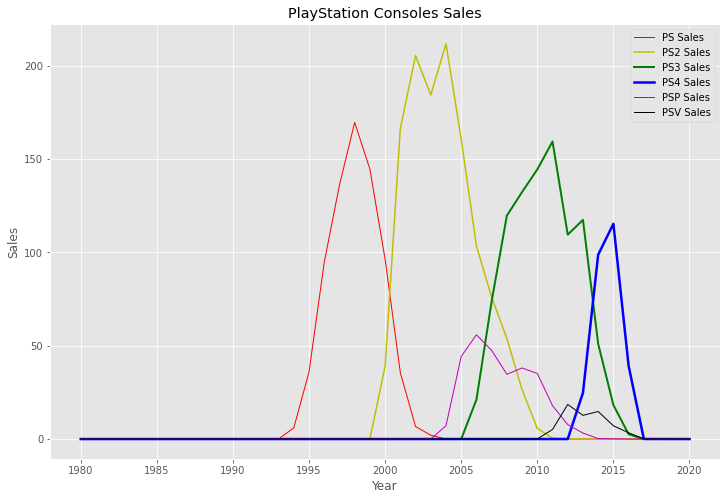

In [51]:
style.use('ggplot')
plt.figure(figsize=(12,8))
plt.plot(psmv['Year'],psmv['ps_Sales'],'r',label='PS Sales',linewidth=1)
plt.plot(psmv['Year'],psmv['ps2_Sales'],'y',label='PS2 Sales',linewidth=1.5)
plt.plot(psmv['Year'],psmv['ps3_Sales'],'g',label='PS3 Sales',linewidth=2)
plt.plot(psmv['Year'],psmv['ps4_Sales'],'b',label='PS4 Sales',linewidth=2.5)
plt.plot(psmv['Year'],psmv['psp_Sales'],'m',label='PSP Sales',linewidth=1)
plt.plot(psmv['Year'],psmv['psv_Sales'],'k',label='PSV Sales',linewidth=1)
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('PlayStation Consoles Sales')
plt.legend()
plt.show()